#### Business objective: Build network intrusion detection system to detect anamolies and attacks in the network.

#### Statistics problem: 
* Binomial Classification: Activity is normal (1) or attack (0)

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC

In [2]:
col_n = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [3]:
train = pd.read_csv('train.txt', sep = ",", header = None, names = col_n)
test = pd.read_csv('test.txt', sep = ",", header = None, names = col_n)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

#### Checking missing values

In [6]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### No missing values in the data

### Data Preparation

#### As Y variable is not straight forward in a classification problem; defining Y variable

* 0 = Attack
* 1 = Normal

In [8]:
train['Y'] = train['attack']
test['Y'] = test['attack']

In [9]:
train['Y'] = np.where(train.Y == "normal", 1, 0)
test['Y'] = np.where(test.Y == "normal", 1, 0)

In [10]:
# dos_list = ['neptune','smurf','apache2','back','processtable','pod','worm','teardrop','land','udpstorm']

In [11]:
# for x in dos_list:
#     train.attack_class[train['attack_class'] == x] = 1
#     test.attack_class[test['attack_class'] == x] = 1

In [12]:
# probe = ['saint','mscan','satan','nmap','ipsweep','portsweep']

In [13]:
# for x in probe:
#     train.attack_class[train['attack_class'] == x] = 2
#     test.attack_class[test['attack_class'] == x] = 2

In [14]:
# r2l = ['guess_passwd','warezmaster','snmpgetattack','httptunnel','snmpguess','mailbomb','multihop','named','sendmail','xlock','xsnoop','ftp_write','imap','phf','warezclient','spy']

In [15]:
# for x in r2l:
#     train.attack_class[train['attack_class'] == x] = 3
#     test.attack_class[test['attack_class'] == x] = 3

In [16]:
# u2r = ['buffer_overflow','ps','loadmodule','xterm','rootkit','perl','sqlattack']

In [17]:
# for x in u2r:
#     train.attack_class[train['attack_class'] == x] = 4
#     test.attack_class[test['attack_class'] == x] = 4

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [20]:
train.drop('attack', axis = 1, inplace = True)
test.drop('attack', axis = 1, inplace = True)

In [21]:
#splitting data into categorical and numerical variables

num_col=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_col=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object', 'O']]

In [22]:
train_num=train[num_col]
test_num=test[num_col]

In [23]:
train_cat=train[cat_col]
test_cat=test[cat_col]

In [24]:
print('train_num', train_num.shape)
print('train_cat', train_cat.shape)
print('test_num', test_num.shape)
print('test_cat', test_cat.shape)

train_num (125973, 40)
train_cat (125973, 3)
test_num (22544, 40)
test_cat (22544, 3)


#### Outlier capping

In [25]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

train_num = train_num.apply(lambda x: outlier_capping(x))
test_num = test_num.apply(lambda x: outlier_capping(x))

In [26]:
# profile_report = pandas_profiling.ProfileReport(train_cat)
# profile_report.to_file('traincat.html')

In [27]:
# removing variables with high cardinality

train_cat.drop('service', axis = 1, inplace = True)
test_cat.drop('service', axis = 1, inplace = True)

In [28]:
train_cat.head()

,protocol_type,flag
0,tcp,SF
1,udp,SF
2,tcp,S0
3,tcp,SF
4,tcp,SF


#### Data Audit Report

In [29]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary = train_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,1.911166e+07,151.712380,0.00,1095.861922,1.200913e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.1568,9590.56
src_bytes,125973.0,0.0,1.296890e+08,1029.498123,44.00,6137.901578,3.767384e+07,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.0000,54540.00
dst_bytes,125973.0,0.0,1.690707e+08,1342.118549,0.00,3804.294003,1.447265e+07,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.80,8314.00,25519.0000,25519.00
land,125973.0,0.0,0.000000e+00,0.000000,0.00,0.000000,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00
wrong_fragment,125973.0,0.0,0.000000e+00,0.000000,0.00,0.000000,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00
urgent,125973.0,0.0,0.000000e+00,0.000000,0.00,0.000000,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00
hot,125973.0,0.0,6.238000e+03,0.049519,0.00,0.351827,1.237823e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0000,3.00
num_failed_logins,125973.0,0.0,0.000000e+00,0.000000,0.00,0.000000,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00
logged_in,125973.0,0.0,4.985200e+04,0.395736,0.00,0.489010,2.391308e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0000,1.00
num_compromised,125973.0,0.0,1.286000e+03,0.010209,0.00,0.100521,1.010440e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0000,1.00


#### Creating Dummy variables

In [30]:
#Creating dummies for nominal categorical variables
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in ['protocol_type' , 'flag']:
    train_cat[c_feature] = train_cat[c_feature].astype('category')
    test_cat[c_feature] = test_cat[c_feature].astype('category')
    train_cat = create_dummies(train_cat , c_feature )
    test_cat = create_dummies(test_cat , c_feature )

In [31]:
#Combining both categorical and Continuous data
train_final = pd.concat([train_num,train_cat],axis=1)
test_final = pd.concat([test_num,test_cat],axis=1)

In [32]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   src_bytes                    125973 non-null  int64  
 2   dst_bytes                    125973 non-null  int64  
 3   land                         125973 non-null  int64  
 4   wrong_fragment               125973 non-null  int64  
 5   urgent                       125973 non-null  int64  
 6   hot                          125973 non-null  int64  
 7   num_failed_logins            125973 non-null  int64  
 8   logged_in                    125973 non-null  int64  
 9   num_compromised              125973 non-null  int64  
 10  root_shell                   125973 non-null  int64  
 11  su_attempted                 125973 non-null  int64  
 12  num_root                     125973 non-null  int64  
 13 

In [33]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  float64
 1   src_bytes                    22544 non-null  int64  
 2   dst_bytes                    22544 non-null  float64
 3   land                         22544 non-null  int64  
 4   wrong_fragment               22544 non-null  int64  
 5   urgent                       22544 non-null  int64  
 6   hot                          22544 non-null  int64  
 7   num_failed_logins            22544 non-null  int64  
 8   logged_in                    22544 non-null  int64  
 9   num_compromised              22544 non-null  int64  
 10  root_shell                   22544 non-null  int64  
 11  su_attempted                 22544 non-null  int64  
 12  num_root                     22544 non-null  int64  
 13  num_file_creatio

#### Assumptions check - Linearity

In [34]:
corr_mat = train_final.corr()

In [35]:
corr_mat

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
duration,1.000000,0.011740,0.036892,NaN,NaN,NaN,0.021274,NaN,-0.064537,0.062081,...,-0.043311,-0.003733,0.020369,0.497641,-0.085618,-0.007463,-0.004180,0.004280,-0.034731,-0.006428
src_bytes,0.011740,1.000000,0.127827,NaN,NaN,NaN,0.379973,NaN,0.163275,0.603363,...,-0.052480,-0.016138,0.007541,0.018268,-0.103727,0.041955,0.011526,0.031067,0.117345,-0.007788
dst_bytes,0.036892,0.127827,1.000000,NaN,NaN,NaN,0.127002,NaN,0.422000,0.237363,...,-0.110385,-0.033535,-0.010092,-0.021514,-0.218180,0.137051,0.043579,0.008654,0.260372,-0.016381
land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hot,0.021274,0.379973,0.127002,NaN,NaN,NaN,1.000000,NaN,0.168938,0.423630,...,-0.044038,-0.000071,-0.004026,0.006100,-0.086690,0.005006,0.068759,0.005233,0.098075,-0.005561
num_failed_logins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
logged_in,-0.064537,0.163275,0.422000,NaN,NaN,NaN,0.168938,NaN,1.000000,0.125493,...,-0.253209,-0.070580,-0.023150,-0.093418,-0.500442,0.052719,0.033628,0.019436,0.641738,-0.037575
num_compromised,0.062081,0.603363,0.237363,NaN,NaN,NaN,0.423630,NaN,0.125493,1.000000,...,-0.031776,-0.009239,-0.002905,0.011668,-0.062807,0.019502,-0.000738,0.002002,0.073022,-0.004715


In [36]:
corr_mat['abs_Y'] = np.absolute(corr_mat['Y'])

In [37]:
corr_mat[corr_mat['abs_Y'] > 0.6]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,abs_Y
logged_in,-0.064537,0.163275,0.422000,NaN,NaN,NaN,0.168938,NaN,1.000000,0.125493,...,-0.070580,-0.023150,-0.093418,-0.500442,0.052719,0.033628,0.019436,0.641738,-0.037575,0.690171
serror_rate,-0.087513,-0.100188,-0.201774,NaN,NaN,NaN,-0.082285,NaN,-0.491925,-0.060378,...,-0.071002,0.018269,-0.089166,0.979174,0.058044,0.037466,0.014392,-0.758419,0.073167,0.650652
srv_serror_rate,-0.087146,-0.099507,-0.202170,NaN,NaN,NaN,-0.082354,NaN,-0.490167,-0.060296,...,-0.070592,0.012845,-0.088459,0.982660,0.052419,0.024159,0.012967,-0.755827,0.074022,0.648289
same_srv_rate,0.085867,0.119280,0.268594,NaN,NaN,NaN,0.103624,NaN,0.600536,0.076678,...,-0.107222,-0.034402,0.085027,-0.765292,0.036971,0.022795,0.013850,0.826883,0.032460,0.751913
dst_host_srv_count,-0.135981,0.000056,0.323255,NaN,NaN,NaN,-0.039057,NaN,0.624365,-0.004396,...,-0.091482,-0.028413,-0.133367,-0.552879,0.012040,0.024130,0.001964,0.670869,-0.047963,0.722536
dst_host_same_srv_rate,-0.139504,0.068032,0.311322,NaN,NaN,NaN,0.013810,NaN,0.604058,0.059500,...,-0.095359,-0.031579,-0.141390,-0.617256,0.013592,0.024946,0.005810,0.733630,-0.050249,0.693803
dst_host_serror_rate,-0.078251,-0.099584,-0.208829,NaN,NaN,NaN,-0.085733,NaN,-0.491478,-0.046812,...,-0.069490,0.001325,-0.086924,0.975844,-0.019868,-0.011914,-0.008307,-0.741814,0.063607,0.651842
dst_host_srv_serror_rate,-0.077955,-0.099962,-0.208729,NaN,NaN,NaN,-0.085295,NaN,-0.493264,-0.050796,...,-0.068584,0.012729,-0.086059,0.981209,-0.013145,-0.016595,-0.008216,-0.745691,0.073571,0.654985
Y,-0.009284,0.004409,0.289517,NaN,NaN,NaN,-0.006637,NaN,0.690171,-0.049946,...,-0.088592,-0.030658,-0.133099,-0.650206,0.049114,0.025629,0.015178,0.756286,-0.049075,1.000000
flag_S0,-0.085618,-0.103727,-0.218180,NaN,NaN,NaN,-0.086690,NaN,-0.500442,-0.062807,...,-0.069296,-0.017691,-0.086570,1.000000,-0.033338,-0.019646,-0.012199,-0.749485,-0.028715,0.650206


In [38]:
#corr_mat.to_csv('corrm.csv')

* Removing variables with missing values
* Removing variables with high correlation with Y (Threshold: 0.5)

In [39]:
train_final.drop(['land','wrong_fragment','urgent','num_failed_logins','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','logged_in','serror_rate','srv_serror_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_serror_rate','dst_host_srv_serror_rate','flag_S0','flag_SF'], axis = 1, inplace = True)

<AxesSubplot:>

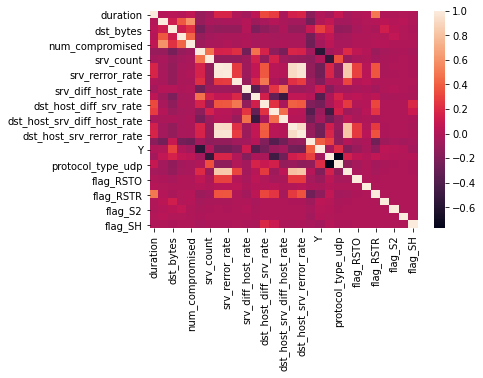

In [40]:
sns.heatmap(train_final.corr())

## Feature reduction

#### Using WOE (Weight of Evidence)
- Identify important variables using WOE or log(odds) comparing with Y
- Variable Transformation: (i) Bucketing if the variables are not having linear relationship with log(odds)

In [41]:
#Assumptions - Linearity (WOE)
#Information value calculation
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [42]:
for col in train_final.columns:
    if col == 'Y': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(train_final, col, 'Y')
        #print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: duration
IV score: 0.14


WoE and IV for column: src_bytes
IV score: 3.36


WoE and IV for column: dst_bytes
IV score: 1.88


WoE and IV for column: hot
IV score: 0.03


WoE and IV for column: num_compromised
IV score: 0.01


WoE and IV for column: count
IV score: 2.59


WoE and IV for column: srv_count
IV score: 0.63


WoE and IV for column: rerror_rate
IV score: 0.29


WoE and IV for column: srv_rerror_rate
IV score: 0.31


WoE and IV for column: diff_srv_rate
IV score: 4.92


WoE and IV for column: srv_diff_host_rate
IV score: 0.89


WoE and IV for column: dst_host_count
IV score: 1.25


WoE and IV for column: dst_host_diff_srv_rate
IV score: 2.78


WoE and IV for column: dst_host_same_src_port_rate
IV score: 1.17


WoE and IV for column: dst_host_srv_diff_host_rate
IV score: 2.33


WoE and IV for column: dst_host_rerror_rate
IV score: 0.32


WoE and IV for column: dst_host_srv_rerror_rate
IV score: 0.54


WoE and IV for column: last_flag
IV score: 1.29


WoE 

In [43]:
# Below variables are considered as important variables as per their IV score :

# duration
# hot
# rerror_rate
# srv_rerror_rate
# dst_host_rerror_rate
# dst_host_srv_rerror_rate
# protocol_type_udp
# flag_REJ
# flag_RSTO
# flag_RSTR


We can select the variables based on the information value and below criteria
 
 - IV: <0.02, Predictive Power: Useless for prediction
 - IV: 0.02 - 0.1, Predictive Power: Weak predictor
 - IV: 0.1 - 0.2, Predictive Power: Medium predictor
 - IV: 0.3 - 0.5, Predictive Power: Storng predictor
 - IV: > 0.5, Predictive Power: Suspecious predictor or too good predictor

#### Univariate Regression

In [44]:
gini_df = pd.DataFrame()
for col in train_final.columns.difference(['Y']):
    model = smf.logit('Y~'+str(col), data=train_final).fit()
    gini = 2*metrics.roc_auc_score(train_final.Y, model.predict(train_final))-1
    temp = pd.DataFrame([col, gini]).T
    gini_df = pd.concat([gini_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.474707
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.666611
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594466
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.615406
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.656414
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.657199
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.686483
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.689234
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.657014
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.690710
  

C:\Users\SHRUTI\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.689106
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.690350
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.690615
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689201
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.690731
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.593763
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689482
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.689334
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.664989
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657051
  

In [45]:
gini_df.columns = ['feature', 'gini']

In [46]:
gini_df.sort_values(by='gini', ascending=False)

,feature,gini
0,dst_bytes,0.799045
0,src_bytes,0.797325
0,diff_srv_rate,0.689472
0,dst_host_diff_srv_rate,0.653356
0,count,0.641608
0,last_flag,0.525786
0,dst_host_count,0.413576
0,srv_diff_host_rate,0.273188
0,rerror_rate,0.173302
0,dst_host_rerror_rate,0.166731


#### RFE

In [47]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
X = train_final[train_final.columns.difference(['Y'])]
y = train_final[['Y']]

rfe = RFE(RandomForestClassifier(), 5)
rfe = rfe.fit(X, y)

In [48]:
rfe.get_support()

array([False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False])

In [49]:
X.columns[rfe.get_support()]

Index(['diff_srv_rate', 'dst_bytes', 'dst_host_diff_srv_rate', 'last_flag',
       'src_bytes'],
      dtype='object')

#### Select KBest

In [50]:
#SelectKbest
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
SKB = SelectKBest(f_classif, k=5).fit(X, y )

X.columns[SKB.get_support()]

Index(['count', 'dst_bytes', 'dst_host_count', 'last_flag', 'srv_rerror_rate'], dtype='object')

### VIF

In [51]:
Final_list = [
'dst_bytes',
'src_bytes',
'diff_srv_rate',
'dst_host_diff_srv_rate',
'count',
'last_flag',
'dst_host_count',
'srv_diff_host_rate',
'duration',
'rerror_rate',
#'srv_rerror_rate',
#'dst_host_rerror_rate',
#'dst_host_srv_rerror_rate',
'protocol_type_udp',
#'flag_REJ'
]

In [52]:
X_new = X[Final_list]

In [53]:
### VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [54]:
vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,features
6,6.399335,dst_host_count
5,6.165165,last_flag
4,2.205624,count
3,2.007713,dst_host_diff_srv_rate
2,1.609179,diff_srv_rate
9,1.423053,rerror_rate
7,1.306366,srv_diff_host_rate
0,1.277244,dst_bytes
10,1.253632,protocol_type_udp
8,1.245615,duration


In [55]:
#
data_final = pd.concat([X_new, y], axis=1)

#### Splitting data into Train and test

In [56]:
#split the data into train & test
train, test = train_test_split(data_final, test_size=0.3, random_state=123)

In [57]:
#split the data into train & test - for sklearn techniques
train_X, test_X,train_y, test_y = train_test_split(X_new, y, test_size = 0.3, random_state=123)

### Model Building - Logistics Regression

In [58]:
formula = "+".join(data_final.columns.difference(['Y', 'src_bytes']))
formula

'count+diff_srv_rate+dst_bytes+dst_host_count+dst_host_diff_srv_rate+duration+last_flag+protocol_type_udp+rerror_rate+srv_diff_host_rate'

In [59]:
#Logistic Regression
model = smf.logit('Y~'+formula, data = train).fit()

Optimization terminated successfully.
         Current function value: 0.213066
         Iterations 9


In [60]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                88181
Model:                          Logit   Df Residuals:                    88170
Method:                           MLE   Df Model:                           10
Date:                Mon, 21 Dec 2020   Pseudo R-squ.:                  0.6915
Time:                        13:20:28   Log-Likelihood:                -18788.
converged:                       True   LL-Null:                       -60906.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -14.7177      0.152    -96.936      0.000     -15.015     -14.420
count                     -0.0223      0.000    -95.522      0.000      -0.023      -0.022
diff

#### Mathematical Equation:-

LE = -14.7177-0.0223 x count -1.1313 x diff_srv_rate + 0.0004 x dst_bytes-0.0084 x dst_host_count-6.4657 x dst_host_diff_srv_rate + 0.0003 x duration + 0.9134 x last_flag + 5.5882 x protocol_type_udp	-0.8422 x rerror_rate	-1.1542 x srv_diff_host_rate

P(Y=1) = exp(LE)/(1+exp(LE))

#### Accuracy Metrics

In [61]:
train['pred'] = model.predict(train)
test['pred'] = model.predict(test)

In [62]:
train

,dst_bytes,src_bytes,diff_srv_rate,dst_host_diff_srv_rate,count,last_flag,dst_host_count,srv_diff_host_rate,duration,rerror_rate,protocol_type_udp,Y,pred
110849,0,0,0.05,0.06,276,18,234,0.0,0.0,0.0,0,0,0.001063
4591,146,105,0.40,0.02,5,20,134,0.0,0.0,0.0,1,1,0.999375
96407,0,0,0.07,0.09,220,21,255,0.0,0.0,0.0,0,0,0.037246
55086,0,8,0.00,0.00,1,18,4,1.0,0.0,0.0,0,0,0.625571
52860,0,0,0.06,0.07,277,20,255,0.0,0.0,0.0,0,0,0.004993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61404,328,733,0.00,0.05,1,21,84,1.0,0.0,0.0,0,1,0.916759
17730,0,0,0.06,0.06,199,18,255,0.0,0.0,0.0,0,0,0.004872
28030,0,0,0.00,0.10,1,14,141,0.0,0.0,1.0,0,0,0.009640
15725,267,222,0.00,0.00,11,21,27,0.0,0.0,0.0,0,1,0.983832


In [63]:
train_gini = 2*metrics.roc_auc_score(train['Y'], model.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['Y'], model.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

print("\n")

train_auc = metrics.roc_auc_score(train['Y'], model.predict(train))
test_auc = metrics.roc_auc_score(test['Y'], model.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The Gini Index for the model built on the Train Data is :  0.943650801971236
The Gini Index for the model built on the Test Data is :  0.9408709560332156


The AUC for the model built on the Train Data is :  0.971825400985618
The AUC for the model built on the Test Data is :  0.9704354780166078


In [64]:
roc_df = pd.DataFrame()
for cut_off in np.linspace(0,1):
    train['y_pred'] = np.where(train.pred >= cut_off, 1, 0)
    train['TP'] = np.where(((train.Y ==1) & (train.y_pred==1)), 1, 0)
    train['TN'] = np.where(((train.Y ==0) & (train.y_pred==0)), 1, 0)
    train['FP'] = np.where(((train.Y ==0) & (train.y_pred==1)), 1, 0)
    train['FN'] = np.where(((train.Y ==1) & (train.y_pred==0)), 1, 0)
    sensitivity = train.TP.sum()/train.Y.sum()
    specificity = train.TN.sum()/(1-train.Y).sum()
    accuracy = (train.TN.sum()+train.TP.sum())/train.Y.count()
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_df = pd.concat([roc_df, roc_like_table], axis=0)

In [65]:
roc_df['total'] = roc_df.sensitivity + roc_df.specificity

In [66]:
roc_df[roc_df.total == roc_df.total.max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.632653,0.911575,0.953463,0.931051,1.865038


In [67]:
train['y_pred'] = np.where(train.pred>0.63, 1, 0)
test['y_pred'] = np.where(test.pred>0.63, 1, 0)

In [68]:
print(metrics.classification_report(train.Y, train.y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     41000
           1       0.96      0.91      0.93     47181

    accuracy                           0.93     88181
   macro avg       0.93      0.93      0.93     88181
weighted avg       0.93      0.93      0.93     88181



In [69]:
print(metrics.classification_report(test.Y, test.y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     17630
           1       0.96      0.91      0.93     20162

    accuracy                           0.93     37792
   macro avg       0.93      0.93      0.93     37792
weighted avg       0.93      0.93      0.93     37792



Baseline model (Logistic Regression) is valid and performed well.

#### Checking if we can get a better accuracy through other Classification algorithms.

In [81]:
#Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10)
dt_model.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
print('Train score', 2*metrics.roc_auc_score(train_y, pd.DataFrame(dt_model.predict_proba(train_X))[1])-1)
print('Test score', 2*metrics.roc_auc_score(test_y, pd.DataFrame(dt_model.predict_proba(test_X))[1])-1)

Train score 0.9793589570212484
Test score 0.9791101549935595


In [83]:
train_pred = np.where(pd.DataFrame(dt_model.predict_proba(train_X))[1]>0.10, 1, 0)
test_pred = np.where(pd.DataFrame(dt_model.predict_proba(test_X))[1]>0.10, 1, 0)

In [84]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89     41000
           1       0.86      1.00      0.92     47181

    accuracy                           0.91     88181
   macro avg       0.93      0.90      0.91     88181
weighted avg       0.92      0.91      0.91     88181



In [85]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90     17630
           1       0.86      1.00      0.92     20162

    accuracy                           0.91     37792
   macro avg       0.93      0.91      0.91     37792
weighted avg       0.92      0.91      0.91     37792



In [ ]:
#SVC
from sklearn.model_selection import GridSearchCV
model = SVC(kernel='rbf', class_weight='balanced')
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(train_X, train_y)

In [ ]:
print(grid.best_params_)

In [ ]:
model = grid.best_estimator_
yfit = model.predict(test_X)

In [ ]:
print(classification_report(train_y, model.predict(train_X)))

In [ ]:
print(classification_report(test_y, yfit))

#### Logistic Regression had the highest Accuracy score, hence, we will opt for Logistic Regression.

In [72]:
#### Lets save everything to pickle object
import pickle

# now you can save it to a file
with open('model_Logistic_reg.pkl', 'wb') as f:
    pickle.dump(model, f)

In [71]:
# and later you can load it
with open('model_Logistic_reg.pkl', 'rb') as f:
    model_new = pickle.load(f)